In [ ]:
# Importing libraries

import numpy as np
import time 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd

from science_jubilee.Machine import Machine
from science_jubilee.tools.Tool import Tool
from science_jubilee.decks.Deck import Deck
from science_jubilee.labware.Labware import Labware, Location, Well
from science_jubilee.tools.Pipette import Pipette
from science_jubilee.tools.Double_Syringe import DoubleSyringe
from science_jubilee.tools.Vacuum_Gripper import VacuumGripper
from science_jubilee.tools.Oceandirect_axo import Spectrometer

In [ ]:
# Manual Offsetting 

deck = Deck("lab_automation_deck") # We are not using the deck, so operate any deck.json 

# -------------Position JSON file for Pipette ---------------------#
tiprack = deck.load_labware(labware_filename = 'opentrons_96_tiprack_1000ul_axo.json', slot = 5)   # Load an opentrons 20uL
tiprack.manual_offset2([[274.1, 219.8],[173.1, 220.0],[173.1, 282.0]], save = True)   # Save through list of list. List of coordinates should be A1 A12 H12 subsequently. 
samples_ot2 = deck.load_labware("uwsunlab_12_wellplate_4000ul_pipette_1.json", slot = 2)
samples_ot2.manual_offset2([[131.3, 135.5], [36.5, 135.8], [36.5, 176.8]], save = True)
samples2_ot2 = deck.load_labware("uwsunlab_12_wellplate_4000ul_pipette_2.json", slot = 0)
samples2_ot2.manual_offset2([[129.8, 40], [35.9, 38.8], [35.9, 79.8]], save = True)
solvent = deck.load_labware("uwsunlab_1_reservoir_60000ul.json", slot = 3)
solvent.manual_offset_small_plate([[225.2, 155.8]], save = True)
    
# -------------Position JSON file for Dual Syringe ---------------#
# samples_sy = deck.load_labware('uwsunlab_6_wellplate_23000ul_sy_1.json', slot = 2)     #new config
samples_sy = deck.load_labware('uwsunlab_10_wellplate_11000ul_sy_1.json', slot = 2)     #new config
samples_sy.manual_offset2([[125.7, 132.6],[48.6, 131.5], [48.6, 172.2]], save = True)
samples2_sy = deck.load_labware('uwsunlab_12_wellplate_4000ul_2.json', slot = 0)
samples2_sy.manual_offset2([[132.2, 36.3], [38.2, 36.3], [38.2, 77.5]], save = True)
precursors = deck.load_labware('uwsunlab_2_wellplate_60000ul.json', slot = 1)
precursors.manual_offset_small_plate([[245.0, 60.0], [197.0, 60.0]], save = True)
# -----------Position JSON file for Spectrometer----------------# 
# samples_spec = deck.load_labware('uwsunlab_12_wellplate_4000ul_spec_1.json', slot = 2)
# samples_spec = deck.load_labware('uwsunlab_6_wellplate_23000ul_spec_1.json', slot = 2)   #new config
samples_spec = deck.load_labware('uwsunlab_10_wellplate_11000ul_spec_1.json', slot = 2)   #new config
samples_spec.manual_offset2([[120.0, 133.3],[43.0, 133.2], [42.6, 173.2]], save = True)
samples2_spec = deck.load_labware('uwsunlab_12_wellplate_4000ul_spec_2.json', slot = 0)
samples2_spec.manual_offset2([[127.3, 35.6], [32.9, 35.6], [33.5, 77.4]], save = True)

 

# ----------Position JSON file for Vacuum Gripper---------------#

Manual offset applied to opentrons_96_tiprack_1000ul
Manual offset saved
Manual offset applied to uwsunlab_12_wellplate_4000ul
Manual offset saved
Manual offset applied to uwsunlab_12_wellplate_4000ul
Manual offset saved
Manual offset applied (1×1 plate),  x_adjust=0.0, y_adjust=0.0
Manual offset saved.
Manual offset applied to uwsunlab_6_wellplate_23000ul
Manual offset saved
Manual offset applied to uwsunlab_12_wellplate_4000ul
Manual offset saved
Manual offset applied (1×2 plate),  x_adjust=0.0, y_adjust=0.0
Manual offset saved.
Manual offset applied to uwsunlab_6_wellplate_23000ul
Manual offset saved
Manual offset applied to uwsunlab_12_wellplate_4000ul
Manual offset saved


In [32]:
# Intialising and homing the Machine 

axo = Machine(address = '192.168.1.2')

In [33]:
axo.home_all()
axo.move_to(z=180) # Safest Z location

In [ ]:
# Loading the labwares

deck = axo.load_deck("lab_automation_deck")

## ---------------------OT2 1000ul Pipette ----------------------------##
tiprack = axo.load_labware("opentrons_96_tiprack_1000ul_axo.json", 5)
tiprack.load_manualOffset()
samples_ot2 = axo.load_labware('uwsunlab_12_wellplate_4000ul_pipette_1.json', 2)
samples_ot2.load_manualOffset()
samples2_ot2 = axo.load_labware('uwsunlab_12_wellplate_4000ul_pipette_2.json', 0)
samples2_ot2.load_manualOffset()
solvent = axo.load_labware('uwsunlab_1_reservoir_60000ul.json', 3)
solvent.load_manualOffset()
trash = (-0.9, 55.8, 99)
## -------------------------------------------------------------------##
#pipette = Pipette(0, "Pipette", brand = "opentron", model = "config", max_volume= 20, min_volume= 0, zero_position = (0,0,0),\
#    blowout_position=None, drop_tip_position = None, mm_to_ul = None)# model = "config")

## ---------------------Dual Syringe Pump ----------------------------##
samples_sy = axo.load_labware('uwsunlab_10_wellplate_11000ul_sy_1.json', 2)         #new config
samples_sy.load_manualOffset()
samples2_sy = axo.load_labware('uwsunlab_12_wellplate_4000ul_2.json', 0)
samples2_sy.load_manualOffset()
precursors = axo.load_labware('uwsunlab_2_wellplate_60000ul.json', 1)
precursors.load_manualOffset()
## ------------------------------------------------------------------##

## --------------------------Spectrometer -------------------------------##
samples_spec = axo.load_labware('uwsunlab_10_wellplate_11000ul_spec_1.json', 2)  #new config
samples_spec.load_manualOffset()
samples2_spec = axo.load_labware('uwsunlab_12_wellplate_4000ul_spec_2.json', 0)
samples2_spec.load_manualOffset()
## ----------------------------------------------------------------------##

## ------------------------Vacuum Gripper --------------------------------##
vacuum_location = [(84, 51, 0),  # Slot 0 (12 Well Plate)
                   (225, 57, 0), # Slot 1 (2 Precursor Container)
                   (84, 147, 0), # Slot 2 (12 Well Plate)
                   (225, 149, 0), # Slot 3 (1 Solvent Container)
                   (79, 244, 0)] # Slot 4 (Lid Containter)



Manual offset applied to opentrons_96_tiprack_1000ul
Manual offset applied to uwsunlab_12_wellplate_4000ul
Manual offset applied to uwsunlab_12_wellplate_4000ul
Manual offset applied (1×1 plate),  x_adjust=0.0, y_adjust=0.0
Manual offset applied to uwsunlab_6_wellplate_23000ul
Manual offset applied to uwsunlab_12_wellplate_4000ul
Manual offset applied (1×2 plate),  x_adjust=0.0, y_adjust=0.0
Manual offset applied to uwsunlab_6_wellplate_23000ul
Manual offset applied to uwsunlab_12_wellplate_4000ul


In [35]:
## Load Double Syringe
syringe = DoubleSyringe(index = 2,
                        name = 'Syringe_Pump',
                        config = '10cc_syringe')
axo.load_tool(syringe)

In [38]:
# Load the spectrometer

spectrometer = Spectrometer(index = 3, 
                            name = 'Spectrometer', 
                            base_dir=r"C:\Users\ADITI\Downloads\Aditya\Axo_Jubilee\science-jubilee\axo\spectrum_data",
                            plate_id = 'testing_5')
                            # ref_dark = 'dark_20250708_165121.npy',
                            # ref_white = 'white_20250708_165110.npy')
axo.load_tool(spectrometer)

Opened Spectrometer 2


In [39]:
# Load Vaccum Gripper
gripper = VacuumGripper(index = 4,
                        name = 'Vacuum_Gripper',
                        vacuum_pin = 0,
                        limit_switch_pin = 2)
axo.load_tool(gripper)

<h1> Prepare a Vial </h1>

In [17]:
# Dual Syringe pre - fill precursor

axo.pickup_tool(syringe)


In [20]:
# Reset the position of the syringe before dispensing
syringe.reset_position()

# # If the syringe has some water inside it, and we dont want to reset its position, we can use the following code
# # In this code we can move the syringe to the precursor location and then reset its position

# drive0 = syringe.e0_drive
# current_pos0 = float(syringe._machine.get_position()[drive0])
# headroom_mm0 = current_pos0 - syringe.min_range
# headroom_ml0 = headroom_mm0 / syringe.mm_to_ml
# syringe.dispense_e0(vol= headroom_ml0, sample_loc_e=precursors[1], refill_loc_e=precursors[1], s=50)
# print(current_pos0)

# drive1 = syringe.e1_drive
# current_pos1 = float(syringe._machine.get_position()[drive1])
# headroom_mm1 = current_pos1 - syringe.min_range
# headroom_ml1 = headroom_mm1 / syringe.mm_to_ml
# syringe.dispense_e1(vol= headroom_ml1, sample_loc_v=precursors[0], refill_loc_v=precursors[0], s=50)
# print(current_pos1)

In [21]:
axo.get_position()

{'X': '173.700',
 'Y': '132.600',
 'Z': '62.000',
 'U': '110.015',
 'V': '0.000',
 'E': '0.000',
 'E0': '0.0',
 'E1': '-0.0'}

In [22]:
## Add precursors to the vials

#### dispense metal precursor
syringe.dispense_e0(vol = 9, sample_loc_e = samples_sy[0].top(2), refill_loc_e = precursors[0] , s = 250)

9.0

In [23]:
syringe.dispense_e0(vol = 6, sample_loc_e = samples_sy[0].top(2), refill_loc_e = precursors[0] , s = 250)

6.0

In [24]:
#### dispense organic precursor
syringe.dispense_e1(vol = 4, sample_loc_v = samples_sy[0].top(2), refill_loc_v = precursors[0] , s = 250)

4.0

In [10]:
# Reset the syringe position before parking 
# syringe.reset_position()

# # If the syringe has some water inside it, and we dont want to reset its position, we can use the following code
# # In this code we can move the syringe to the precursor location and then reset its position

drive0 = syringe.e0_drive
current_pos0 = float(syringe._machine.get_position()[drive0])
headroom_mm0 = current_pos0 - syringe.min_range
headroom_ml0 = headroom_mm0 / syringe.mm_to_ml
syringe.dispense_e0(vol= headroom_ml0, sample_loc_e=precursors[1], refill_loc_e=precursors[1], s=50)
print(current_pos0)

drive1 = syringe.e1_drive
current_pos1 = float(syringe._machine.get_position()[drive1])
headroom_mm1 = current_pos1 - syringe.min_range
headroom_ml1 = headroom_mm1 / syringe.mm_to_ml
syringe.dispense_e1(vol= headroom_ml1, sample_loc_v=precursors[0], refill_loc_v=precursors[0], s=50)
print(current_pos1)

14.1
-0.0


In [25]:
### Park the tool
axo.park_tool()

In [40]:
# Cover the precursors and the vials

axo.pickup_tool(gripper)

gripper.pick_and_place(grip = vacuum_location[4], drop =vacuum_location[1], pwm= 0.7, retract_z_after_probe = 3.0)

gripper.pick_and_place(grip = vacuum_location[4], drop =vacuum_location[2], pwm= 0.7, retract_z_after_probe = 3.0)

axo.park_tool()

In [41]:
# Remove the lid over the vials

axo.pickup_tool(gripper)

gripper.pick_and_place(grip = vacuum_location[2], drop =vacuum_location[4], pwm= 0.7, retract_z_after_probe = 3.0)

axo.park_tool()

In [42]:
# Take t0 readings using the spectrometer

axo.pickup_tool(spectrometer)

spectrometer.configure_device()

In [70]:
spectrometer.position_probe(solvent[0].top(-13))

In [71]:
spectrometer.set_white()

'white_20250709_135756'

In [72]:
spectrometer.set_dark() 

'dark_20250709_135800'

(2068, 2)
(2068, 2)


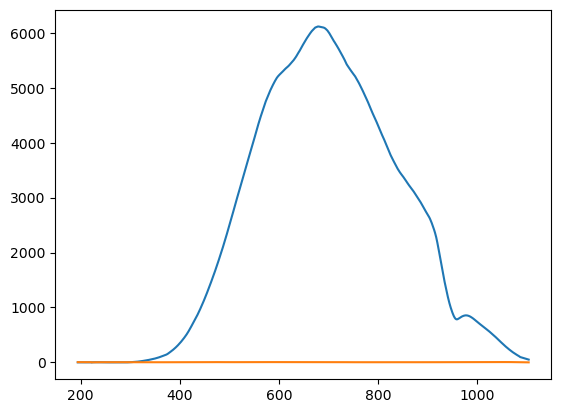

In [73]:
# Dark and white spectrum
white = np.load(spectrometer._white_path)
dark = np.load(spectrometer._dark_path)
print(white.shape)
plt.plot(white[:, 0], white[:, 1])
plt.plot(dark[:, 0], dark[:, 1])
print(dark.shape)

Plot saved to: C:\Users\ADITI\Downloads\Aditya\Axo_Jubilee\science-jubilee\axo\spectrum_data\testing_5\A1_15min_absorbance.png


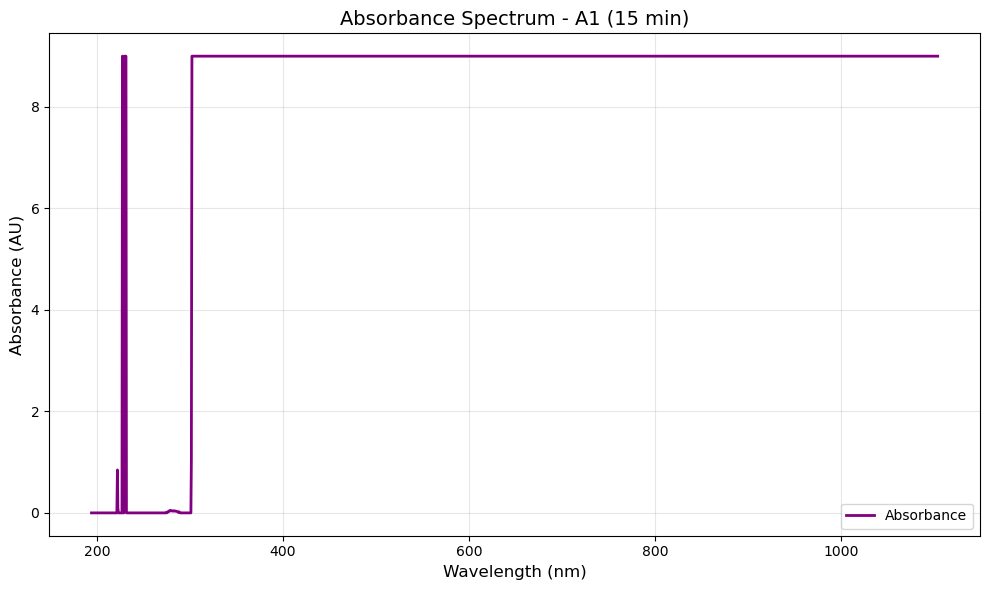

In [ ]:
wavelengths_blue, vals_blue, absorbance_blue = spectrometer.collect_spectrum(samples_spec[0].top(-13), 15, save= True)
# plt.plot(wavelengths_blue, absorbance_blue, label="Absorbance")
# plt.plot(wavelengths_blue, vals_blue, label="Intensity")
# plt.legend()
wavelengths_blue0, absorbance_blue0 = spectrometer.plot_spectrum(samples_spec[0].top(-13), elapsed_min=15, show_plot=True, save_plot=True)

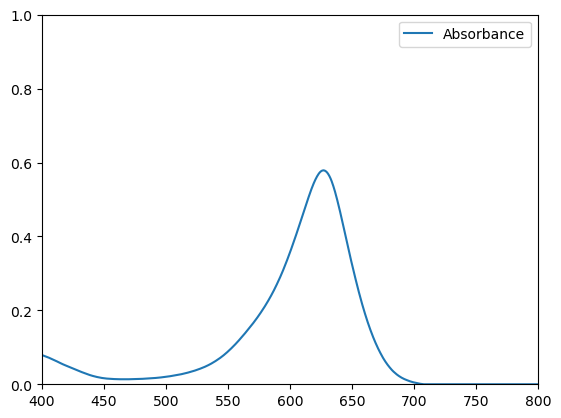

In [82]:
plt.plot(wavelengths_blue, absorbance_blue, label="Absorbance")
plt.xlim(400, 800)
plt.ylim(0, 1)
plt.legend()


In [83]:
# cleanse the spectrometer before parking
for i in range(5):
    spectrometer.position_probe(solvent[0].top(-13))

In [84]:
axo.park_tool()

In [85]:
# Cover the vials

axo.pickup_tool(gripper)

gripper.pick_and_place(grip = vacuum_location[4],
                       drop = vacuum_location[2], pwm = 0.7, retract_z_after_probe = 3.0)

axo.park_tool()